In [1]:
!git clone https://github.com/agustinroviraquezada/MRI_T1_T2_CycleGAN.git

Cloning into 'MRI_T1_T2_CycleGAN'...
remote: Enumerating objects: 1251, done.
remote: Counting objects: 100% (505/505), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 1251 (delta 389), reused 369 (delta 292), pack-reused 746
Receiving objects: 100% (1251/1251), 447.31 MiB | 26.25 MiB/s, done.
Resolving deltas: 100% (776/776), done.
Updating files: 100% (74/74), done.


In [3]:
requirements= "/content/MRI_T1_T2_CycleGAN/requirements.txt"
!pip install -r $requirements -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.12.2 which is incompatible.


In [5]:

import matplotlib.pyplot as plt
import torch
import numpy
import nibabel

In [15]:
!gzip -d *.nii.gz

In [14]:
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --help

usage: Test.py [-h] --input INPUT --model MODEL --Modality MODALITY [--HDBET HDBET]
               [--filters FILTERS] [--dim DIM] [--crop CROP] [--operation OPERATION]
               [--BlackProportion BLACKPROPORTION]

Pipeline de procesamiento

options:
  -h, --help            show this help message and exit
  --input INPUT         Input file path. File must be a .nii or tensor 128 x 128
  --model MODEL         Path to the model
  --Modality MODALITY   Input Modality
  --HDBET HDBET         Apply HDBET only for .nii
  --filters FILTERS     Apply image selection based on the black pixel proportion
  --dim DIM             Dimention where to iterate. For .nii where is the dimention to iterate
  --crop CROP           Apply centering crop
  --operation OPERATION
                        Apply Image normalization
  --BlackProportion BLACKPROPORTION
                        Black Pixel Proportion threshold


In [ ]:
brain_slice = nibabel.load(input).get_fdata()
sagittal_slice = brain_slice[:, 175, :]
sagittal_slice = nibabel.Nifti1Image(sagittal_slice, affine=numpy.eye(4))
# Plot the slice
plt.imshow(sagittal_slice, cmap='gray', origin='lower')

In [50]:
sagittal_slice.to_filename("175_t1.nii")

You just have loaded a input file of (256, 256, 150)
/content/MRI_T1_T2_CycleGAN/cycle/Test.py:73: RuntimeWarning: invalid value encountered in divide
  images_scaled = img / np.max(img, axis=(1, 2))[:, np.newaxis, np.newaxis]


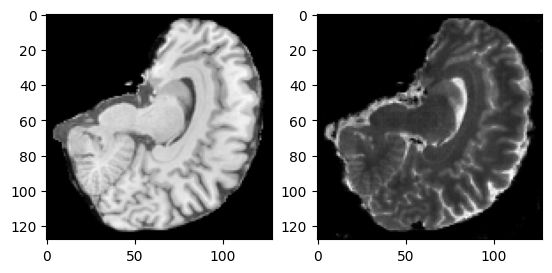

In [66]:
input="/content/11_t1w_stripped.nii"
model="/content/MRI_T1_T2_CycleGAN/Models/Optimized_model_0.690-290.ckpt"
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --input $input --model $model --Modality "T1" --dim 2

fig, axs = plt.subplots(1, 2)
T1=torch.squeeze(torch.load("/content/Original/B_84.pt").to('cpu')).numpy()
T2=torch.squeeze(torch.load("/content/Synthetic/s_B_84.pt").to('cpu')).numpy()
axs[0].imshow(T1,cmap="gray")
axs[1].imshow(T2,cmap="gray")
plt.show()

In [74]:
!ls -l

total 77128
-rw-r--r-- 1 root root 39321952 May  1 02:40 11_t1w_stripped.nii
-rw-r--r-- 1 root root 39321952 May  1 02:40 11_t2w_stripped.nii
-rw-r--r-- 1 root root   307552 May  1 03:25 175_t1.nii
drwxr-xr-x 7 root root     4096 May  1 02:39 MRI_T1_T2_CycleGAN
drwxr-xr-x 2 root root     4096 May  1 03:31 Original
drwxr-xr-x 1 root root     4096 Apr 29 13:25 sample_data
drwxr-xr-x 2 root root     4096 May  1 03:31 Synthetic


30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


<ipython-input-78-6e971aa30eea>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 3, figsize=(10, 5))


50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


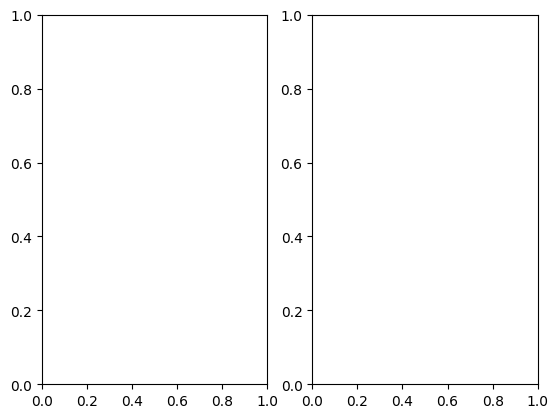

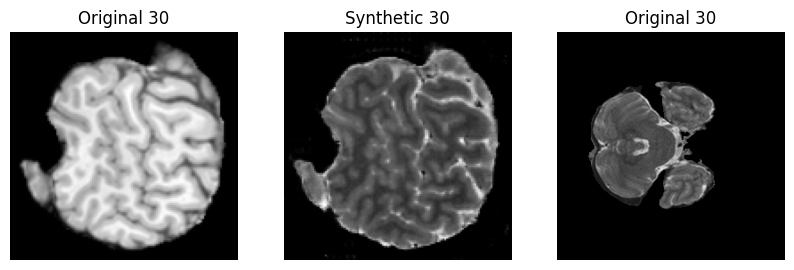

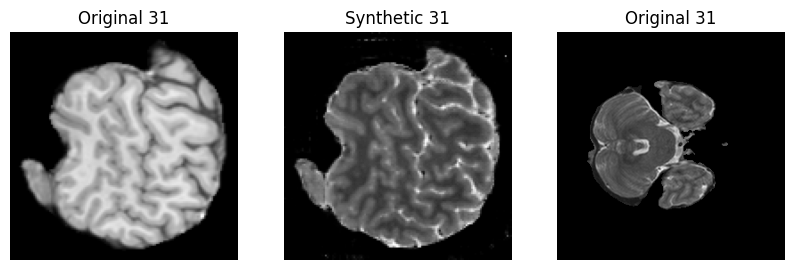

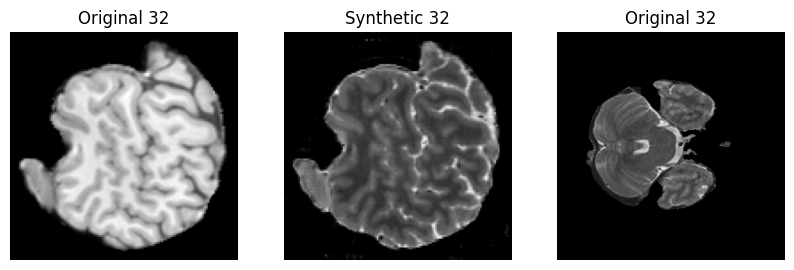

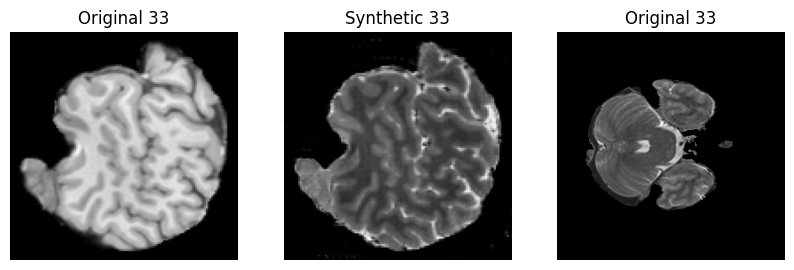

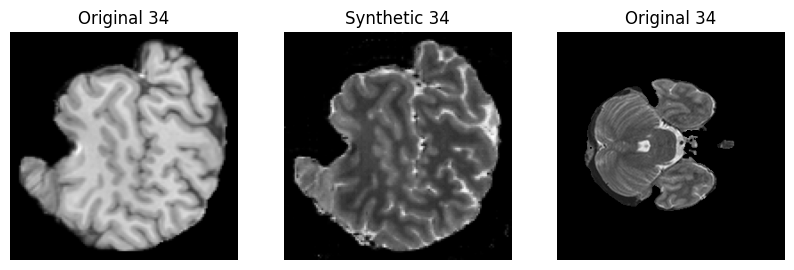

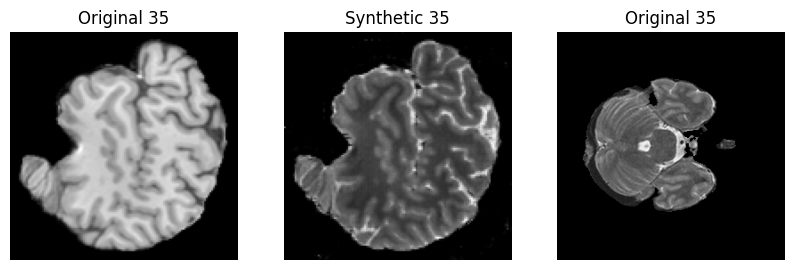

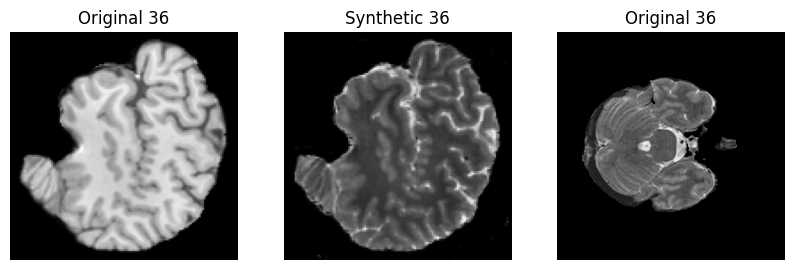

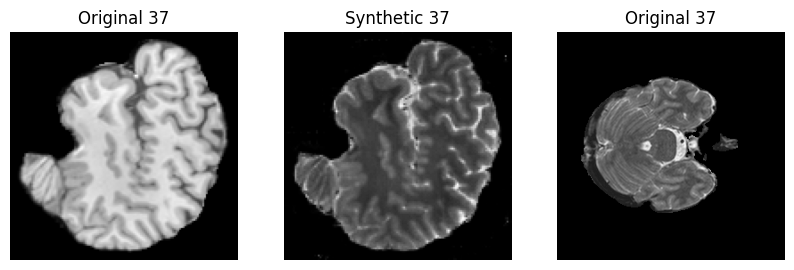

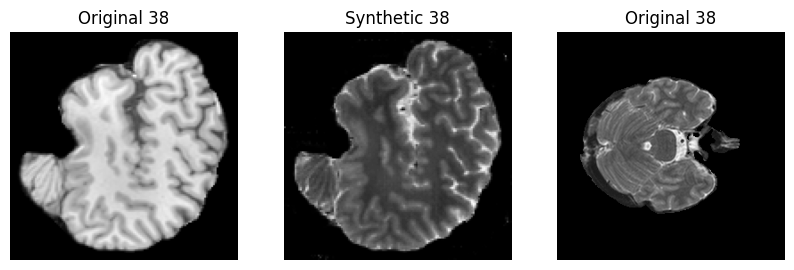

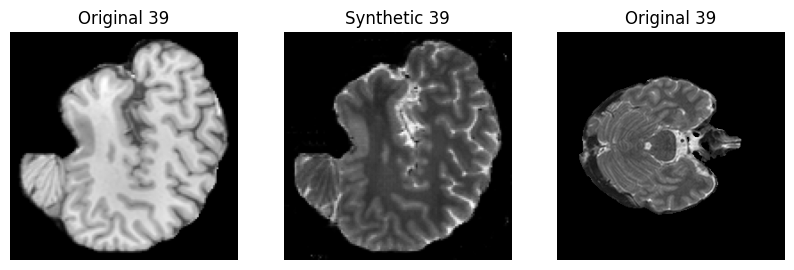

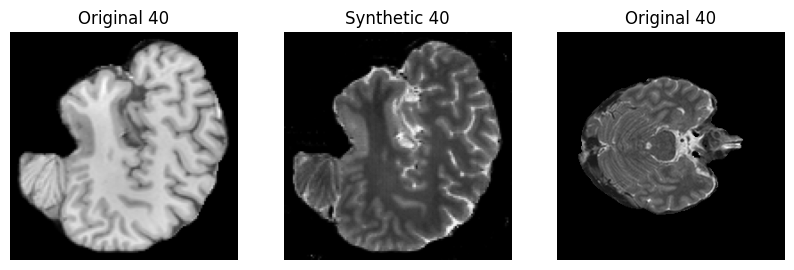

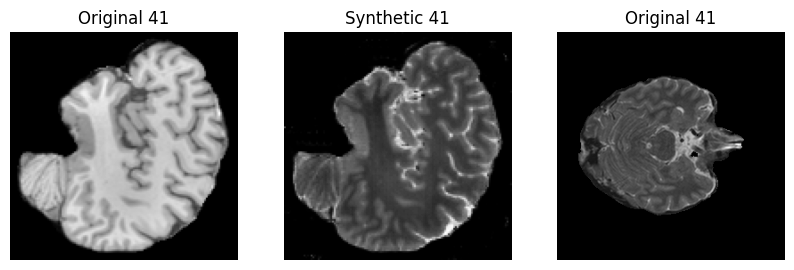

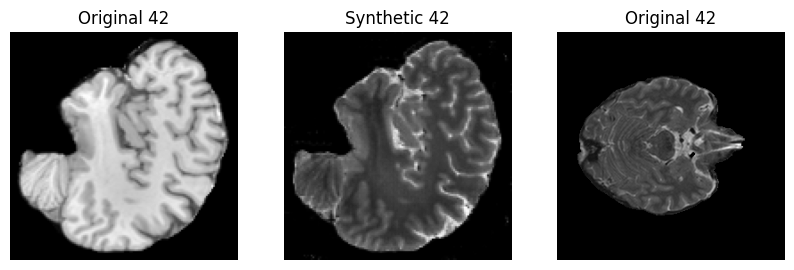

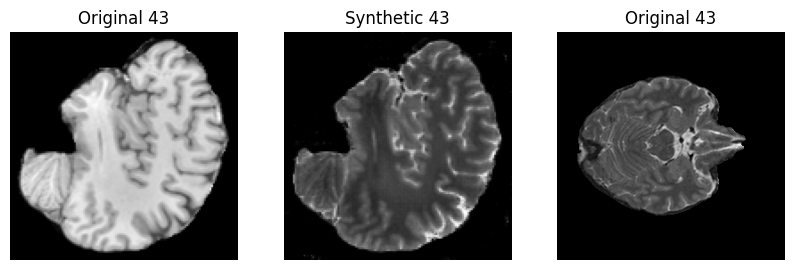

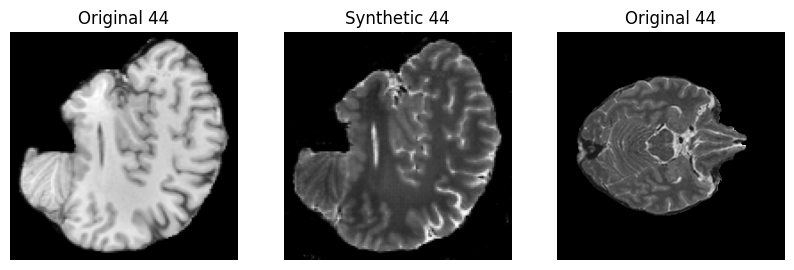

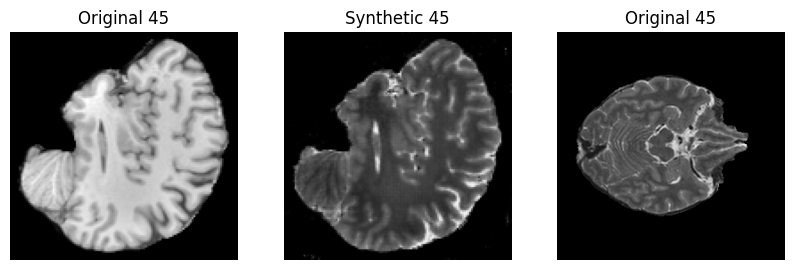

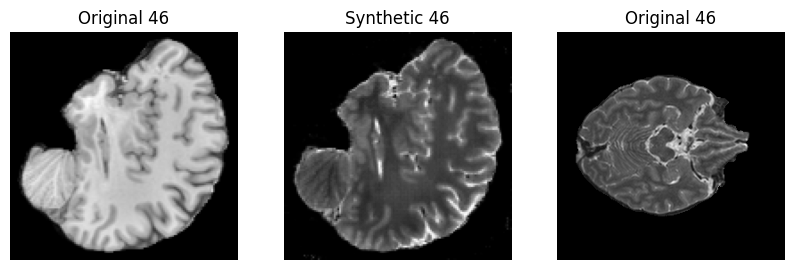

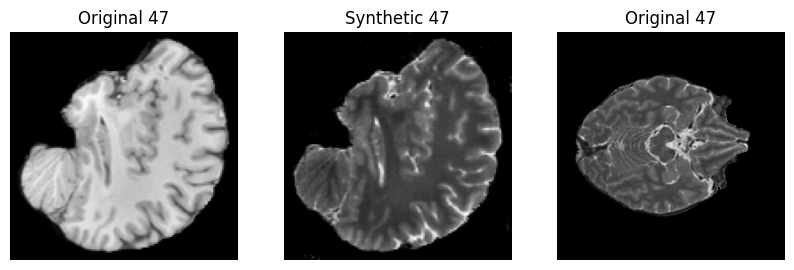

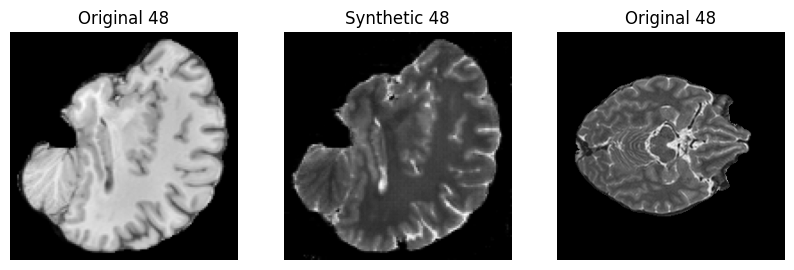

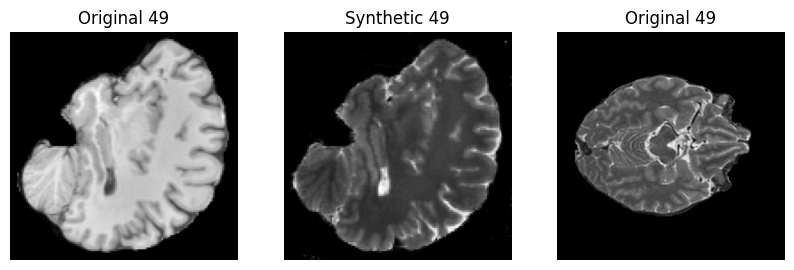

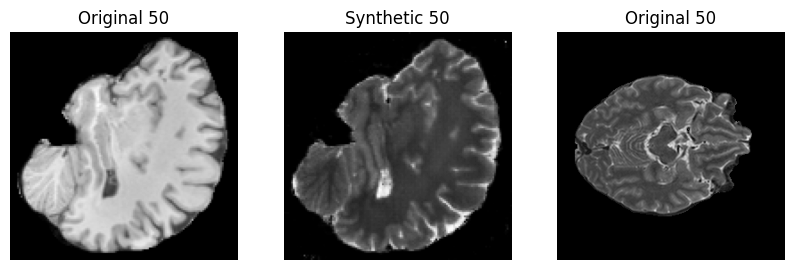

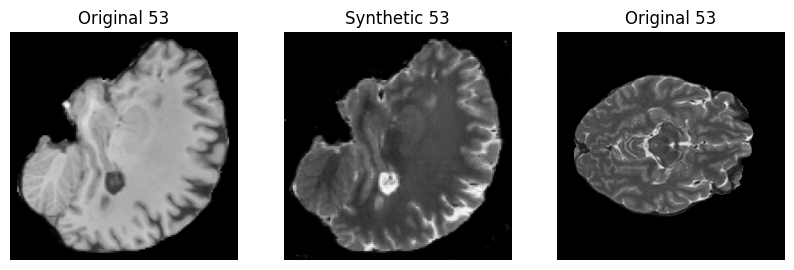

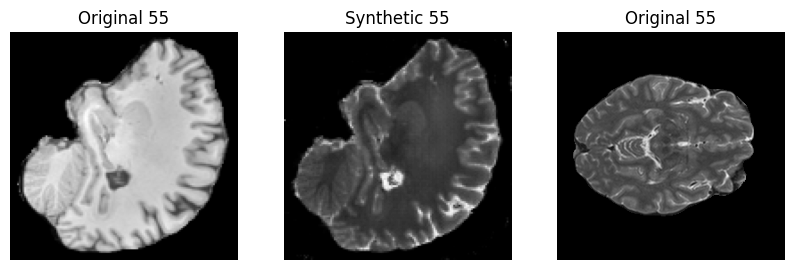

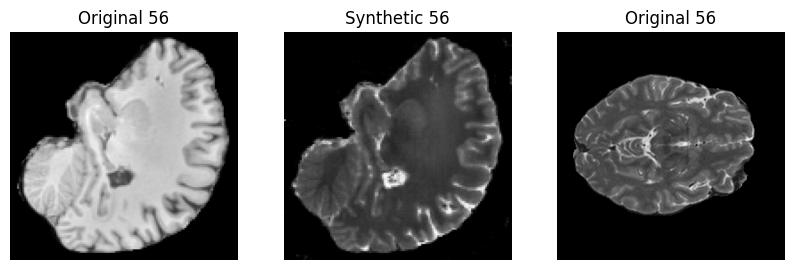

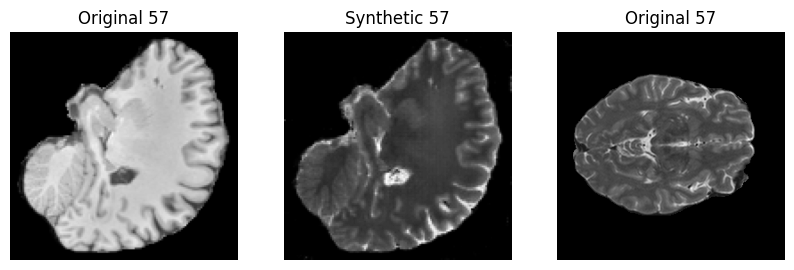

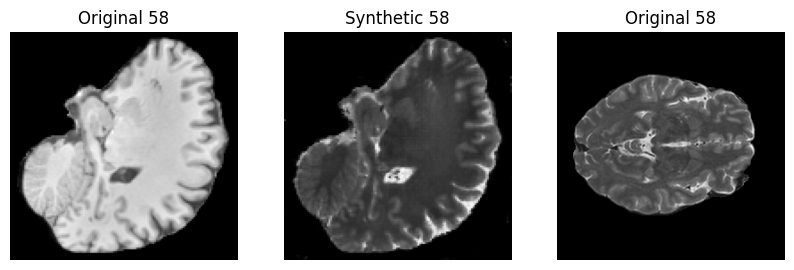

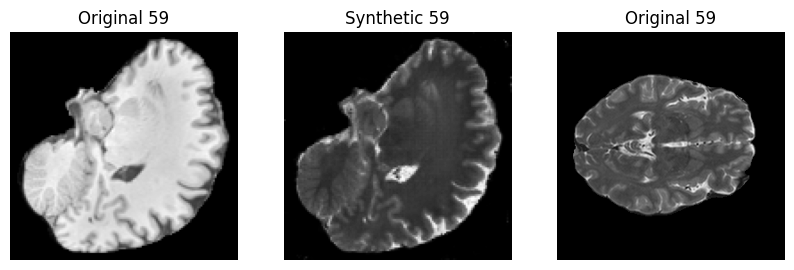

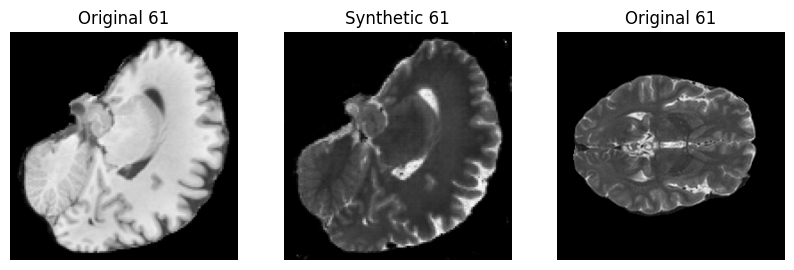

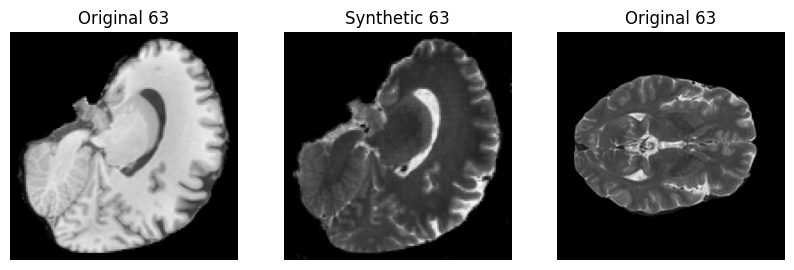

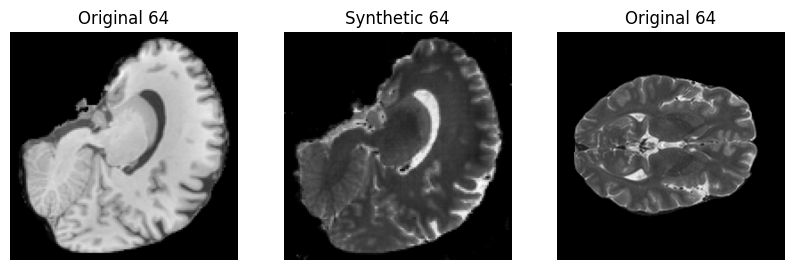

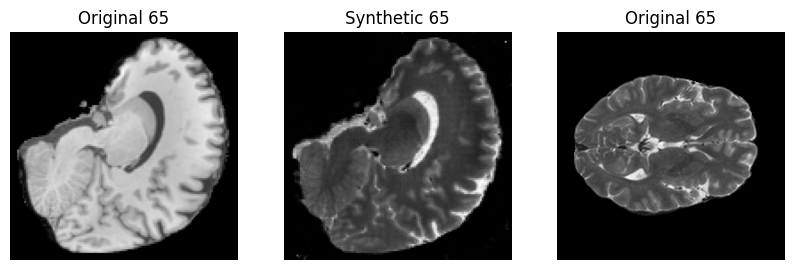

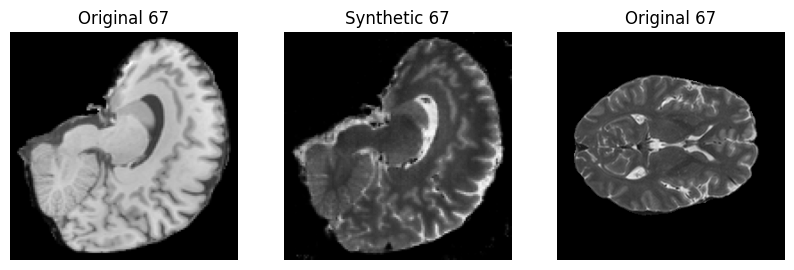

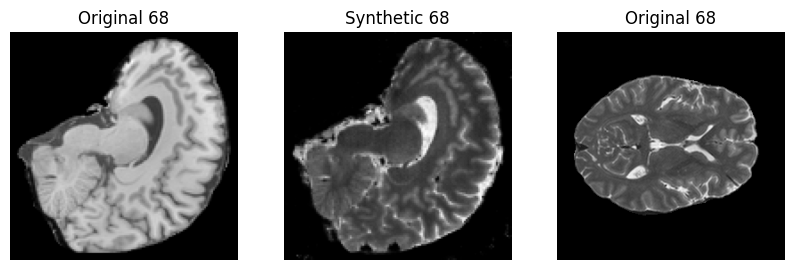

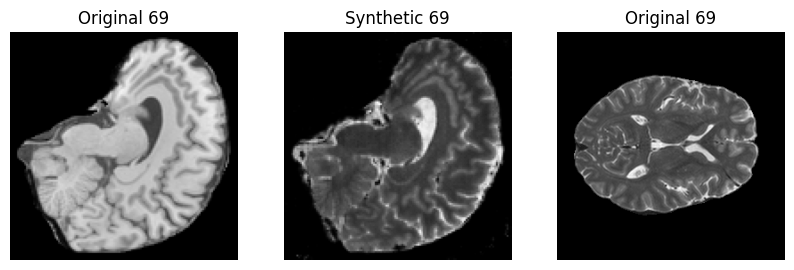

In [78]:
fig, axs = plt.subplots(1, 2)
for i in range (30, 70):
  try:
    print(i)
    T1=torch.squeeze(torch.load(f"/content/Original/B_{i}.pt").to('cpu')).numpy()
    T2=torch.squeeze(torch.load(f"/content/Synthetic/s_B_{i}.pt").to('cpu')).numpy()
    T3 = sagittal_slice = data_real_t2[:, :, i]
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    # Display the original image
    axs[0].imshow(T1, cmap="gray")
    axs[0].set_title(f"Original {i}")
    axs[0].axis('off')  # Optionally turn off the axis

    # Display the synthetic image
    axs[1].imshow(T2, cmap="gray")
    axs[1].set_title(f"Synthetic {i}")
    axs[1].axis('off')  # Optionally turn off the axis

    axs[2].imshow(T3, cmap="gray")
    axs[2].set_title(f"Original {i}")
    axs[2].axis('off')  # Optionally turn off the axis

    # Save the figure
    plt.savefig(f"/content/Images/Comparison_{i}.png")  # Adjust the path as needed
    plt.close()  # Close the figure to free memory
  except:
    continue

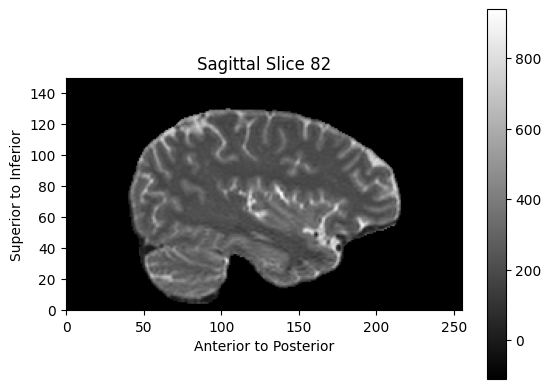

In [77]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the image
real_t2 = nib.load("/content/11_t2w_stripped.nii")

# Get the data array from the image object
data_real_t2 = real_t2.get_fdata()

# Select the 82nd slice in the sagittal plane
# Assuming the image array is in the format [X, Y, Z] (sagittal, coronal, axial)
sagittal_slice = data_real_t2[82, :, :]

# Plot the slice
plt.imshow(sagittal_slice.T, cmap='gray', origin='lower')
plt.title('Sagittal Slice 82')
plt.xlabel('Anterior to Posterior')
plt.ylabel('Superior to Inferior')
plt.colorbar()
plt.show()


In [83]:
import os
def stack_and_save_nii(directory, output_file):
    # List all .pt files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.pt')]
    files.sort()  # Sort files to maintain the order of slices

    # Load each file, convert to numpy, and collect them in a list
    slices = []
    for file in files:
        path = os.path.join(directory, file)
        array = torch.squeeze(torch.load(path).to('cpu')).numpy()  # Load the tensor
        #array = tensor.numpy()  # Convert tensor to numpy array
        slices.append(array)

    # Stack all slices along the third dimension (assuming slices are 2D)
    volume = numpy.stack(slices, axis=-1)

    # Create a NIfTI image from the numpy array
    nii_img = nibabel.Nifti1Image(volume, affine=numpy.eye(4))  # Default identity affine

    # Save the NIfTI image
    nibabel.save(nii_img, output_file)

# Example usage
directory = '/content/Synthetic'  # Directory containing .pt files
output_file = '11_synt2w.nii'  # Path to save the .nii file
stack_and_save_nii(directory, output_file)